# Code to solve magnetic mirror for pulsating aurora

written by Riley Troyer Fall 2020

In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np

In [15]:
# Constants
# Pitch angle measured at equator plane
pitch_ang = np.pi/4
# Radius of field line at equatorial plane
earth_r = 6378
L = 5.5
r_0 = earth_r*L #km

In [16]:
# Radial variable
r = np.linspace(0, r_0, 1000)

# Function to find zero of
def f(r, pitch_ang, r_0):
    a = 1/((np.sin(pitch_ang)**4)*r_0**6)
    b = 3/r_0
    
    return a*r**6 + b*r - 4

def df_dr(r, pitch_ang, r_0):
    a = 6/((np.sin(pitch_ang)**4)*r_0**6)
    b = 3/r_0    
    
    return a*r**5 + b

In [17]:
# I want to solve for radial value for
#...multiple pitch angles
pitch_angs = np.linspace(0.01, np.pi/2, 1000)
deg_angs = pitch_angs*(180/np.pi)
mirror_r = np.zeros(len(pitch_angs))

In [18]:
for n, pitch_ang in enumerate(pitch_angs):

    # Numerically solve for zero point with Newton's Method
    guess_i = np.argmin(abs(f(r, pitch_ang, r_0)))
    guess = r[guess_i]
    old_guess = 0

    err = 1e-5
    ticker = 0

    while(abs(guess - old_guess) > err):
        # Exit if ticker is larger than number
        if ticker > 1000:
            print('Convergence not reached.')
            break
        ticker = ticker + 1

        # Perorm Newton's method
        old_guess = guess
        guess = old_guess - (f(old_guess, pitch_ang, r_0)/
                             df_dr(old_guess, pitch_ang, r_0))
        
    mirror_r[n] = guess

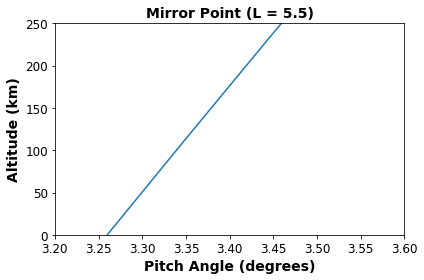

In [22]:
# Plot radius by pitch angle
fig, ax = plt.subplots()
plt.plot(deg_angs, mirror_r - earth_r)

# Labels
ax.set_title('Mirror Point (L = ' + str(L) + ')',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Pitch Angle (degrees)',
              fontsize=14, fontweight='bold')
ax.set_ylabel('Altitude (km)',
              fontsize=14, fontweight='bold')
ax.tick_params(labelsize=12)

# Axis limits
#ax.set_ylim(0, 250) # good for L=6.6
#ax.set_xlim(2.4, 2.7)

ax.set_ylim(0, 250)
ax.set_xlim(3.2, 3.6)

plt.tight_layout()
plt.savefig('mirror-point.png', dpi=100)